In [1]:
%reset -s -f
%run helpers.ipynb

import logging
import os

import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyro
import graphviz
import pyro.distributions as dist
import pyro.distributions.constraints as constraints

smoke_test = ('CI' in os.environ)
assert pyro.__version__.startswith('1.8.4')

pyro.enable_validation(True)
pyro.set_rng_seed(1)
logging.basicConfig(format='%(message)s', level=logging.INFO)

# Set matplotlib settings
%matplotlib inline
plt.style.use('default')

In [2]:
data = torch.zeros(10)
data[0:6] = torch.ones(6)  # 6 heads and 4 tails

In [12]:
def model(data):
    # sample f from the beta prior
    #f = pyro.sample("latent_fairness", dist.Beta(alpha0, beta0))
    # loop over the observed data using pyro.sample with the obs keyword argument
    for i in range(len(data)):
        # observe datapoint i using the bernoulli likelihood
        pyro.sample("obs_{}".format(i), dist.Normal(0,1), obs=data[i])

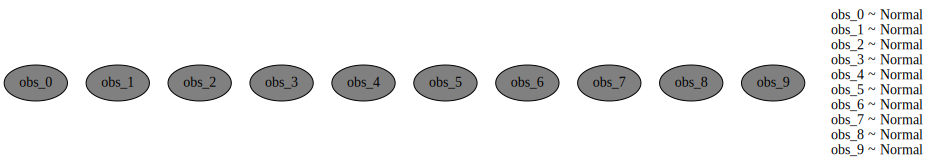

In [13]:
pyro.render_model(model, model_args=(data,), render_distributions=True)